# Import libraries and dataset

In [1]:
import pickle

In [2]:
def read_pickle(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)
def write_pickle(obj, filename):
    with open(filename,'wb') as f:
        pickle.dump(obj,f)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploration Data Analysis (EDA)

## Overview

In [4]:
df=pd.read_csv('ibm_hr.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
categorical_features = []
numerical_features = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_features.append(column)
    else:
        numerical_features.append(column)
print(f'Numerical features: {len(numerical_features)}')
print(f'Categorical features: {len(categorical_features)}')

Numerical features: 26
Categorical features: 9


<BarContainer object of 2 artists>

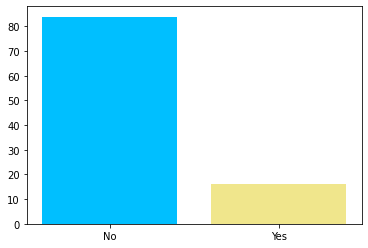

In [7]:
t=(df['Attrition'].value_counts(normalize=True) * 100)
x=t.index
y=t.values
plt.bar(x,y, color=['deepskyblue','khaki'])

Summary of this data

- **Data Structure**: 1470 rows and 35 columns, 26 numerical features and 9 categorical features
- **Missing Data**: there is no missing data
- **Data Type**: there are only 2 data types: text and integer
- **Label**: Attrition
- **Data Distribution**: 84% employees did not leave their organizations, while 16% employees did => **imbalanced** dataset

In [8]:
unique_values=list()
for c in df.columns:
    u=tuple(df[c].unique())
    unique_values.append({
        'Column':c,
        'Number of unique values': len(u),
        'Unique values': u
    })
pd.DataFrame(unique_values)

,Column,Number of unique values,Unique values
0,Age,43,"(41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
1,Attrition,2,"(Yes, No)"
2,BusinessTravel,3,"(Travel_Rarely, Travel_Frequently, Non-Travel)"
3,DailyRate,886,"(1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
4,Department,3,"(Sales, Research & Development, Human Resources)"
5,DistanceFromHome,29,"(1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
6,Education,5,"(2, 1, 4, 3, 5)"
7,EducationField,6,"(Life Sciences, Other, Medical, Marketing, Tec..."
8,EmployeeCount,1,"(1,)"
9,EmployeeNumber,1470,"(1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."


- **EmployeeCount**, **Over18** and **StandardHours** have only 1 unique value, and should be dropped
- **EmployeeNumber** contains employee id, and should be dropped
- **PerformanceRating** has only 2 unique values instead of 4

Drop redundant columns and recalculate number of features

In [9]:
df=df.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber'])

In [10]:
categorical_features = []
numerical_features = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_features.append(column)
    else:
        numerical_features.append(column)
print(f'Numerical features: {len(numerical_features)}')
print(f'Categorical features: {len(categorical_features)}')

Numerical features: 23
Categorical features: 8


## Boxplot

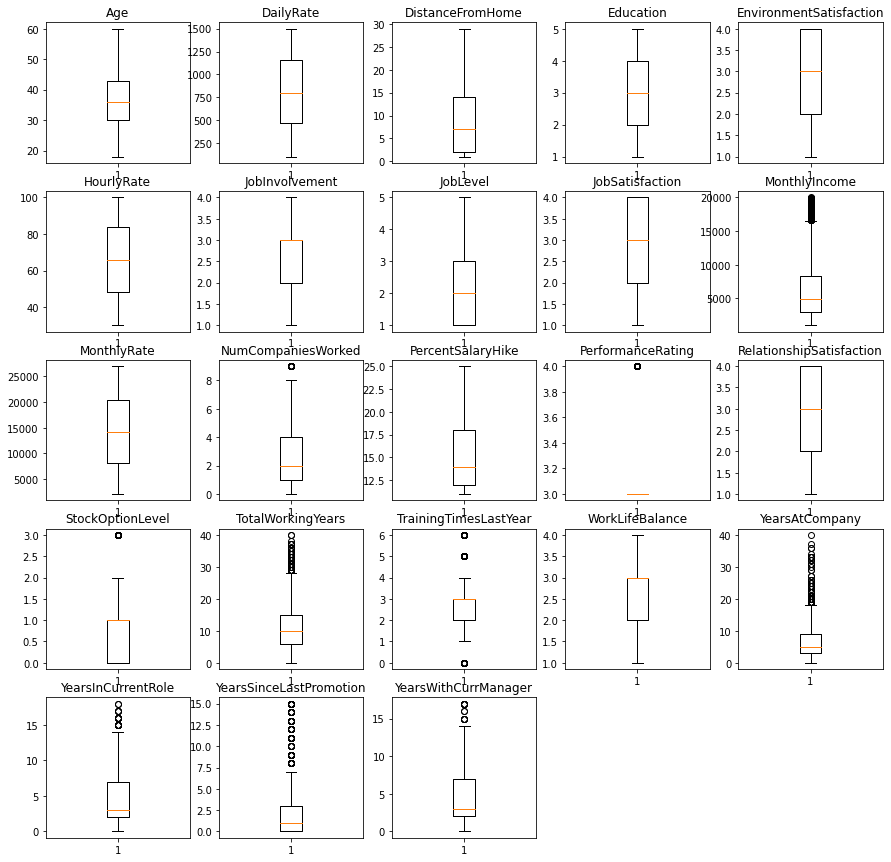

In [11]:
plt.figure(figsize=(15, 15))
for i, c in enumerate(numerical_features, 1):
    plt.subplot(5, 5, i)
    plt.title(c)
    plt.boxplot(df[c])

**MonthlyIncome**, **TotalWorkingYears**, **YearsAtCompany**, **YearsInCurrentRole**, **YearsSinceLastPromotion** and **YearsWithCurrManager** have outliers. Therefore, we need to **standardize** data before training models

## How Features affect Attrition

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
df_1=df.copy()

In [14]:
encoder = LabelEncoder()
df_1['Attrition'] = encoder.fit_transform(df_1['Attrition'])

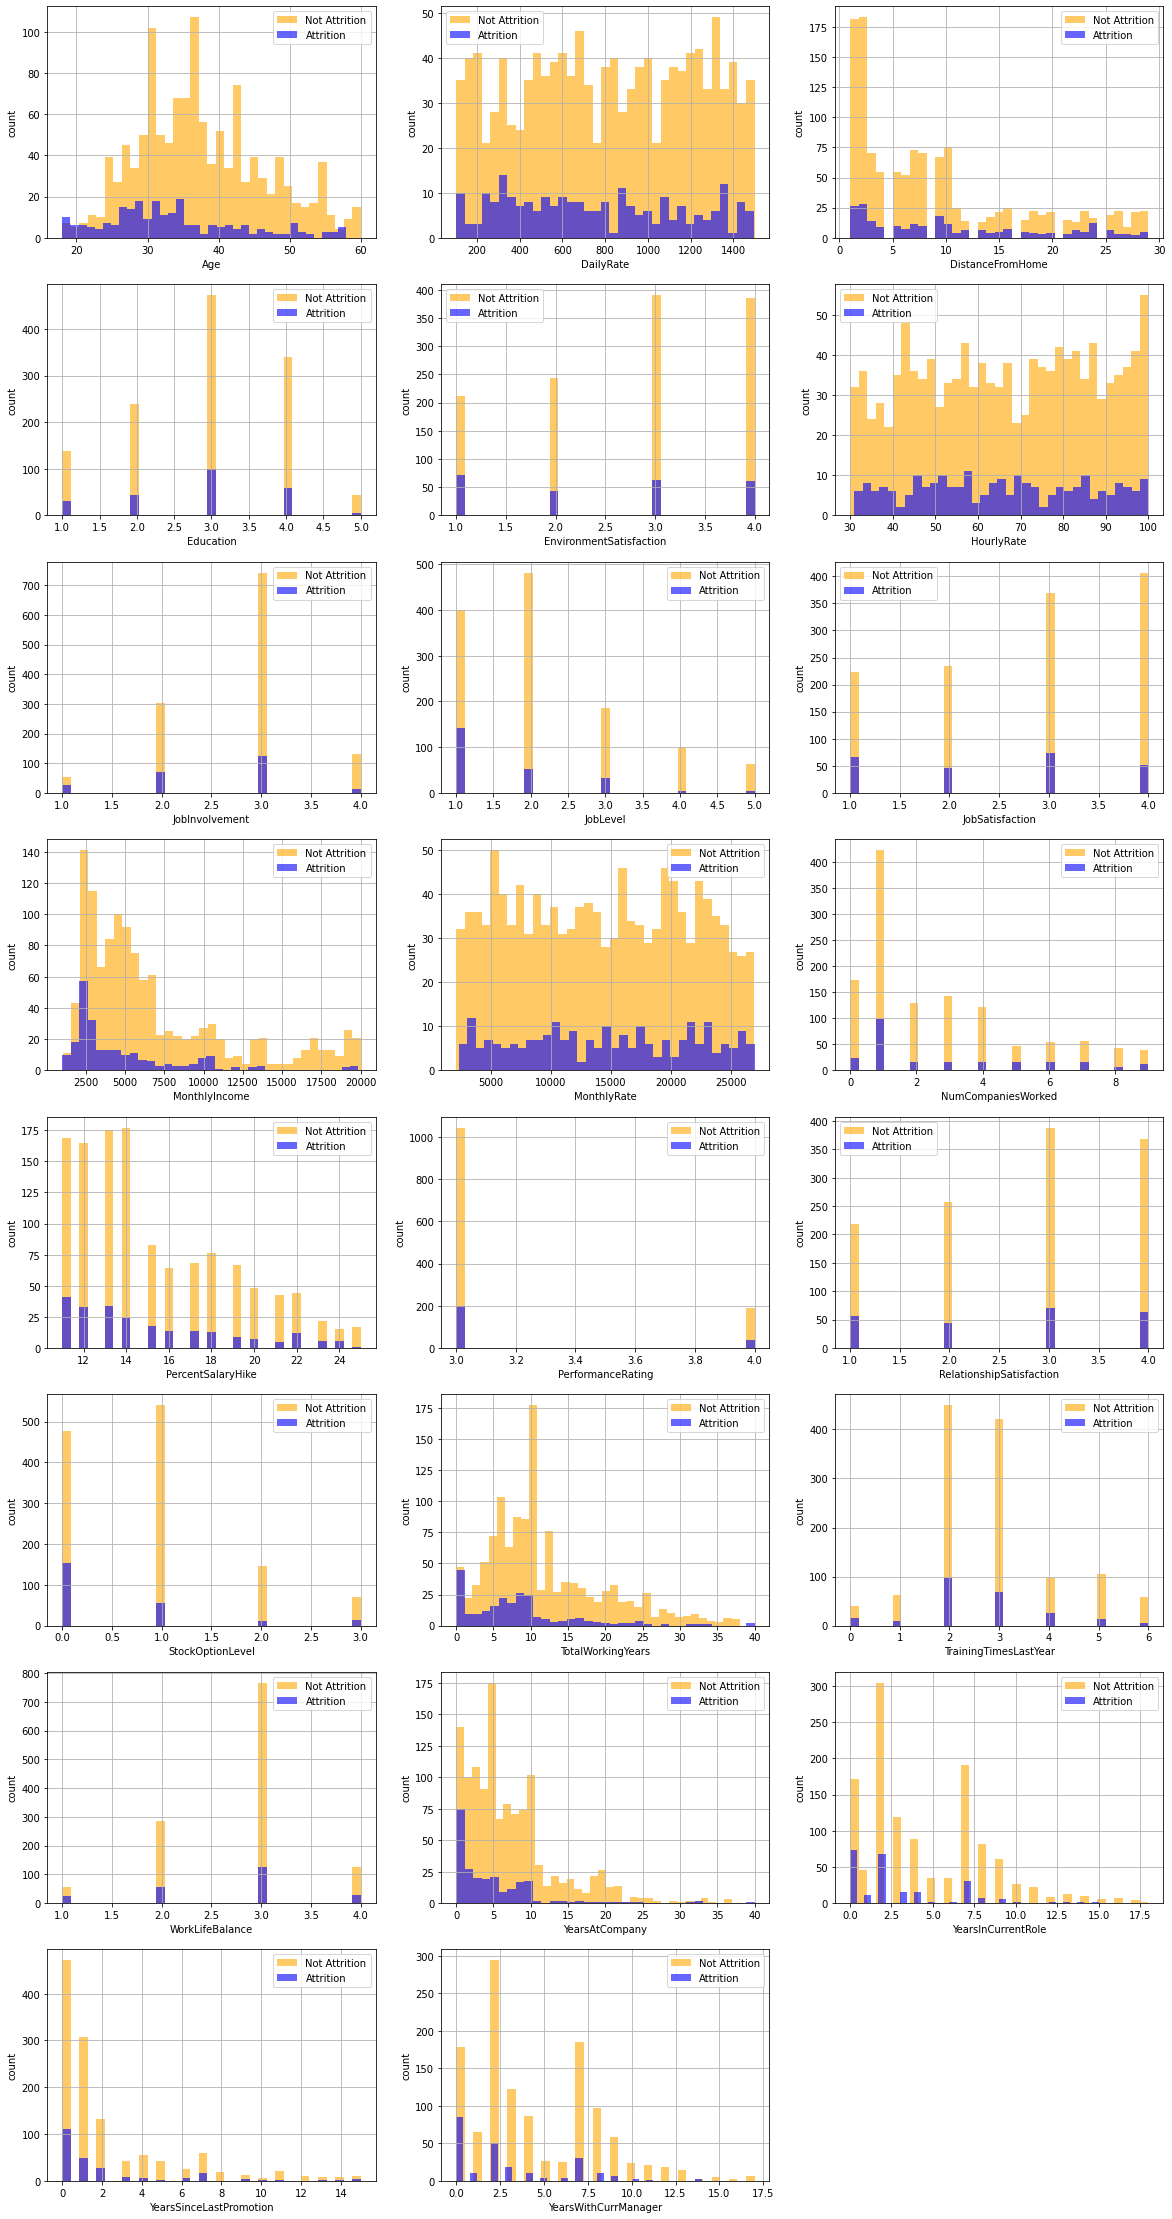

In [15]:
plt.figure(figsize=(20, 40))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(8, 3, i)
    df_1[df_1["Attrition"] == 0][feature].hist(bins=35, color='orange', label='Not Attrition', alpha=0.6)
    df_1[df_1["Attrition"] == 1][feature].hist(bins=35, color='blue', label='Attrition', alpha=0.6)
    plt.legend()
    plt.xlabel(feature)
    plt.ylabel('count')

## Heatmap

<AxesSubplot:>

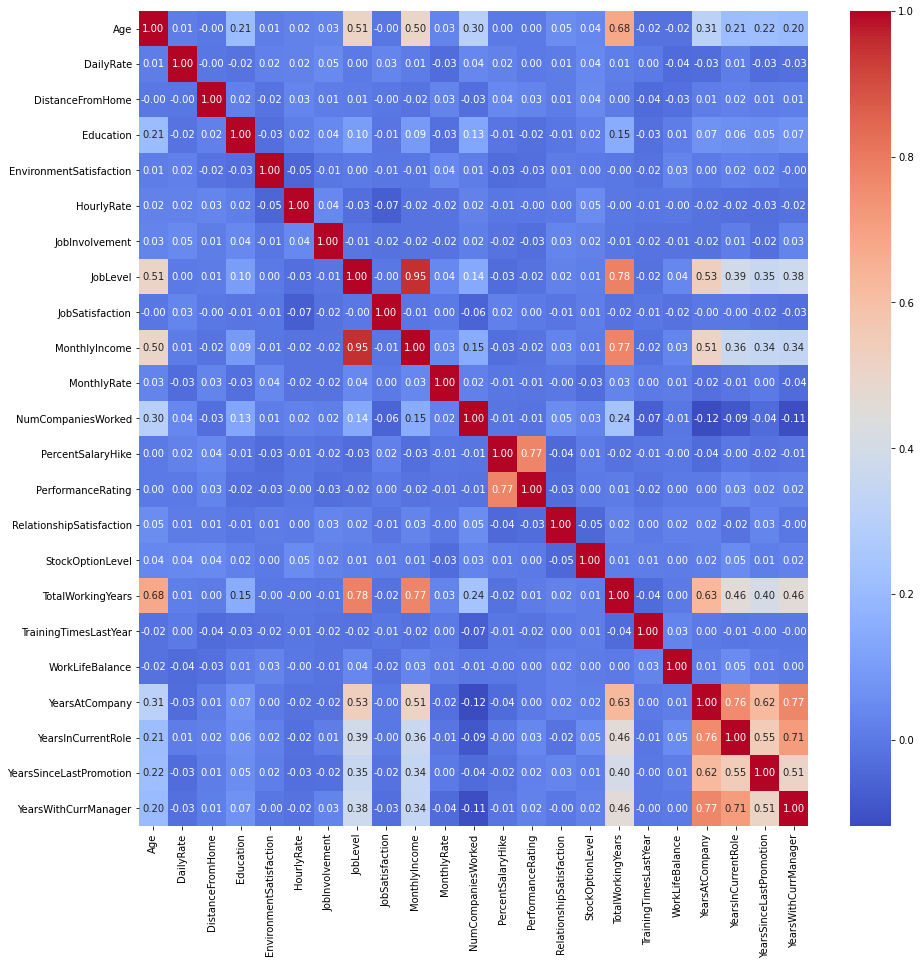

In [16]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')

- **JobLevel** and **MonthlyIncome** are highly correlated
- **TotalWorkingYears** is correlated with **JobLevel** and **MonthlyIncome**
- **YearsAtCompany** is correlated with **YearsIncurrentRole** and **YearsWithCurrManager**
- **YearsIncurrentRole** is correlated with **YearsWithCurrManager**

We need to use **Dimensionality Reduction** method before training models.

# Prediction

- Numerical features have outliers => scaling data
- Highly correlated features => PCA
- Imbalanced data => Undersampling, Oversampling

## Utility functions

In [17]:
fn='ibm_hr/{}.pkl'
sampling_methods=('normal','under','over')

In [18]:
MODELS = {
    'knn': 'K-Nearest Neighbors',
    'gnb': 'Gaussian Naive Bayes',
    'lr': 'Logistic Regression',
    'dt': 'Decision Tree',
    'rf':'Random Forest',
    'svm':'SVM'
}
def convert_model_name(array):
    return tuple(map(lambda x:MODELS[x], array))

In [19]:
def plot_eval_result(rs):
    plt.figure(figsize=(20, 10))
    for k,v in rs.items():
        x=convert_model_name(v.keys())
        y=tuple(v.values())
        plt.plot(x,y,'o-',label=f'{k} sampling')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

## With standardized data

In [20]:
std_rs=dict()
for m in sampling_methods:
    std_rs[m]=read_pickle(fn.format(f'rs_std_{m}'))

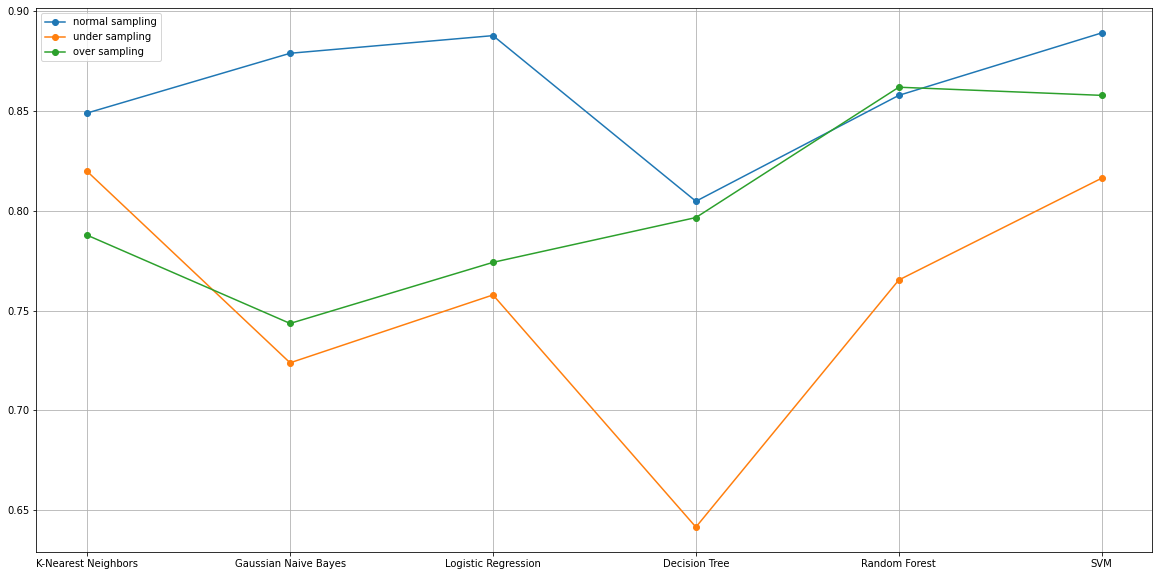

In [21]:
plot_eval_result(std_rs)

## With normalized data

In [22]:
norm_rs=dict()
for m in sampling_methods:
    norm_rs[m]=read_pickle(fn.format(f'rs_norm_{m}'))

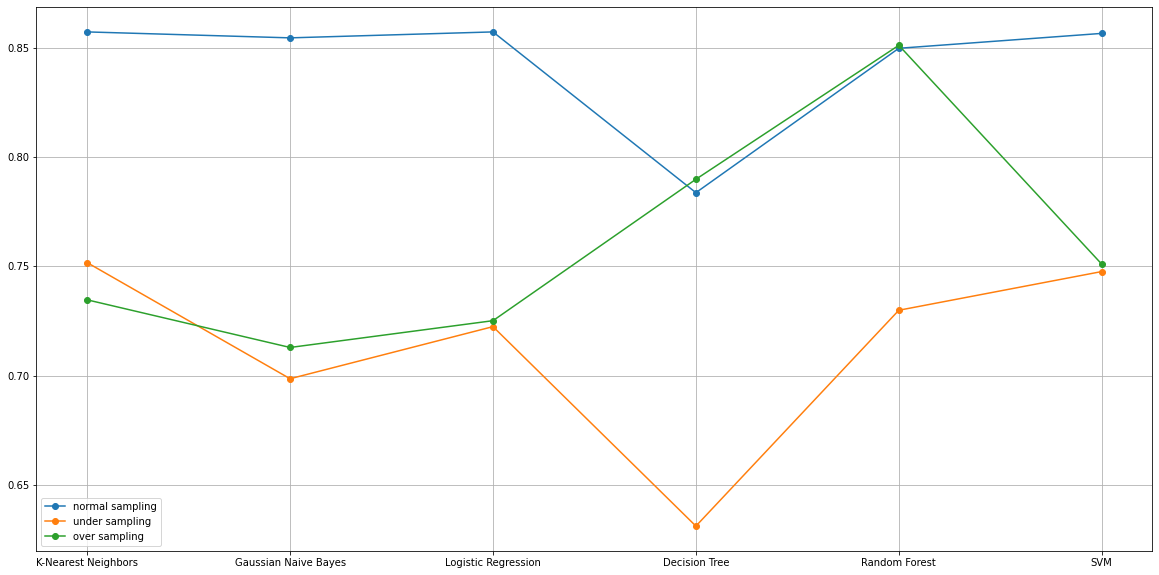

In [23]:
plot_eval_result(norm_rs)

## Compare standardized vs normalized data

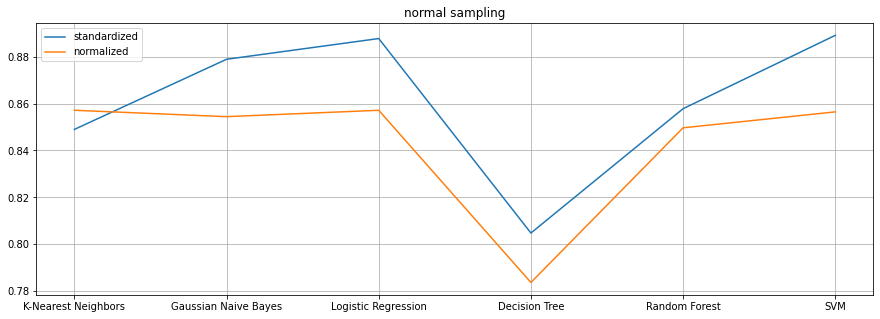

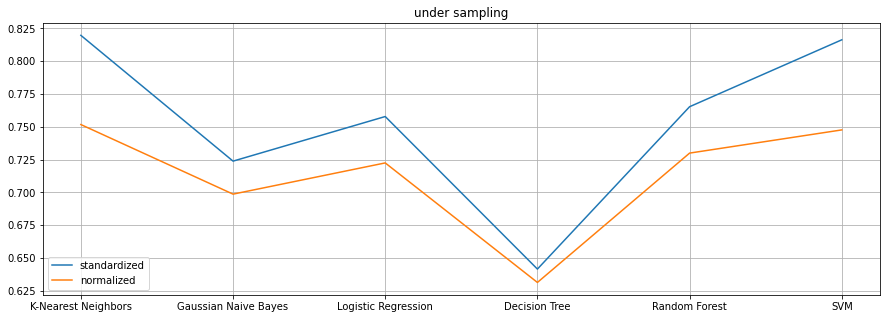

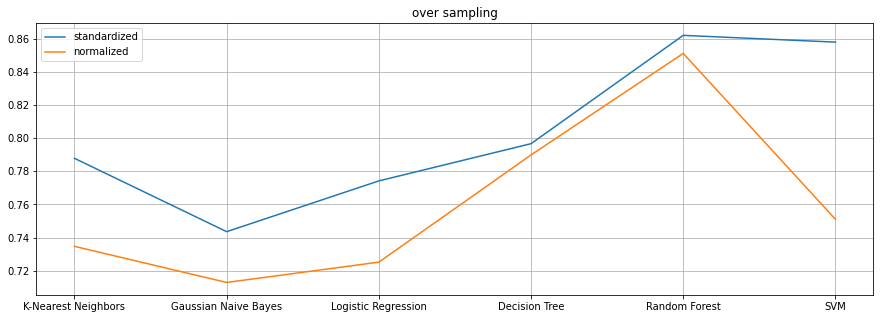

In [24]:
for k,v in enumerate(sampling_methods, 1):
    plt.figure(figsize=(15, 5))
    plt.title(f'{v} sampling')
    rs1=std_rs[v]
    rs2=norm_rs[v]
    x1=convert_model_name(rs1.keys())
    y1=tuple(rs1.values())
    x2=convert_model_name(rs2.keys())
    y2=tuple(rs2.values())
    plt.plot(x1,y1, label='standardized')
    plt.plot(x2,y2, label='normalized')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()